# User Behavior Analysis Project

## Introduction
This project aims to analyze user behavior data to uncover insights related to screen time, app usage, and battery drain. The analysis focuses on various demographics and operating systems to provide a comprehensive overview of user engagement.

## Table of Contents
1. [Import Libraries and Load the Dataset](#import-libraries-and-load-the-dataset)
2. [Data Cleaning and Exploration](#data-cleaning-and-exploration)
3. [Answering Key Questions with Visualizations](#answering-key-questions-with-visualizations)
   - [3.1 What Age and Gender Use the Most Screen Time?](#31-what-age-and-gender-use-the-most-screen-time)
   - [3.2 Which Operating System Has the Most App Usage Time and Screen On Time?](#32-which-operating-system-has-the-most-app-usage-time-and-screen-on-time)
   - [3.3 Find the Correlation Between Screen On Time and Battery Drain](#33-find-the-correlation-between-screen-on-time-and-battery-drain)
4. [Save Cleaned Data for Tableau Visualization](#save-cleaned-data-for-tableau-visualization)

## Step 1: Import Libraries and Load the Dataset
In this step, we import the necessary libraries and load the user behavior dataset.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the dataset
data = pd.read_csv('user_behavior_dataset.csv')

# Display the first few rows
data.head()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [2]:
# Checking the number of rows and columns in the dataset
data.shape

(700, 11)

In [3]:
# Check the columns names
data.columns.tolist()

['User ID',
 'Device Model',
 'Operating System',
 'App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age',
 'Gender',
 'User Behavior Class']

## Step 2: Data Cleaning and Exploration

In this step we check for missing values, remove any uncessesary columns, and check data types (convert if necessary). Then we get a quick statisicaly summary. 

In [4]:
# Check the data types to make sure they are correct
data.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [5]:
# Check for missing values
data.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [6]:
# Make sure there are no duplicates
data.duplicated().sum()

0

In [7]:
# Drop unneeded columns
data.drop(['User ID','User Behavior Class'], axis=1, inplace=True)
data.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


In [8]:
data.describe(include='all')

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
count,700,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700
unique,5,2,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Xiaomi Mi 11,Android,NaN,NaN,NaN,NaN,NaN,NaN,Male
freq,146,554,NaN,NaN,NaN,NaN,NaN,NaN,364
mean,NaN,NaN,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,NaN
std,NaN,NaN,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,NaN
min,NaN,NaN,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,NaN
25%,NaN,NaN,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,NaN
50%,NaN,NaN,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,NaN
75%,NaN,NaN,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,NaN


## Step 3: Answering Key Questions with Visualizations

### 3.1 What Age and Gender Use the Most Screen Time?

We wanted to check the screen time by age to see if anything stood out.

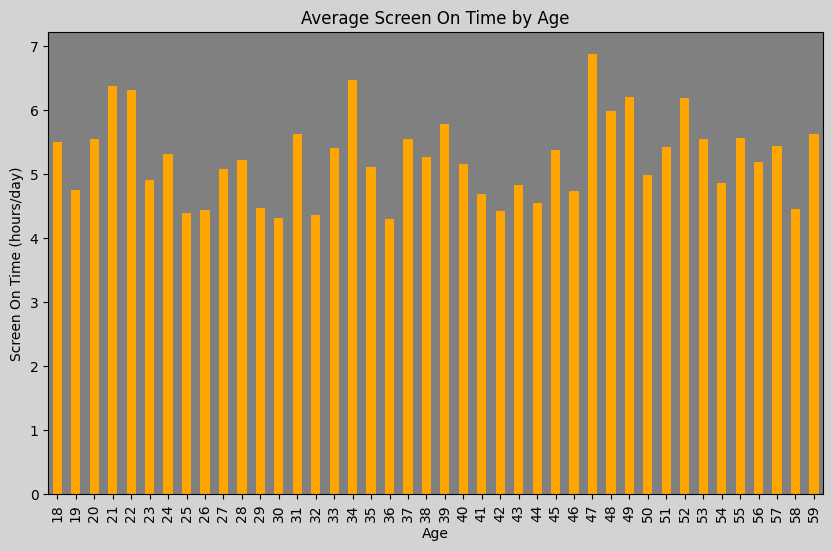

In [9]:
# Average Screen On Time by Age
screen_time_by_age = data.groupby('Age')['Screen On Time (hours/day)'].mean()

# Plotting
plt.figure(figsize=(10, 6), facecolor='lightgrey')
plt.gca().set_facecolor('grey')
screen_time_by_age.plot(kind='bar', color='orange')
plt.title('Average Screen On Time by Age')
plt.xlabel('Age')
plt.ylabel('Screen On Time (hours/day)')
plt.show()

Next we check screen time by Gender

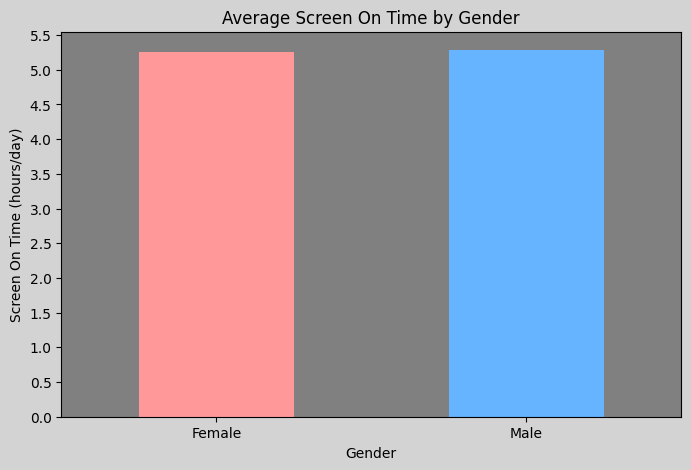

In [10]:
# Average Screen On Time by Gender
screen_time_by_gender = data.groupby('Gender')['Screen On Time (hours/day)'].mean()

# Plotting
plt.figure(figsize=(8, 5), facecolor='lightgrey')
plt.gca().set_facecolor('grey')
screen_time_by_gender.plot(kind='bar', color=['#ff9999','#66b3ff'])
plt.yticks(np.arange(0, 6, step=0.5))
plt.title('Average Screen On Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Screen On Time (hours/day)')

plt.xticks(rotation=0)
plt.show()

In [11]:
# Comfirming that both Genders are roughly the same 
data[data['Gender'] == 'Male']['Screen On Time (hours/day)'].mean()

5.283241758241759

In [12]:
data[data['Gender'] == 'Female']['Screen On Time (hours/day)'].mean()

5.2613095238095235

### 3.2 Which Operating System Has the Most App Usage Time and Screen On Time?

Next we want to check App Usage time and Screen On Time for each Operating System.

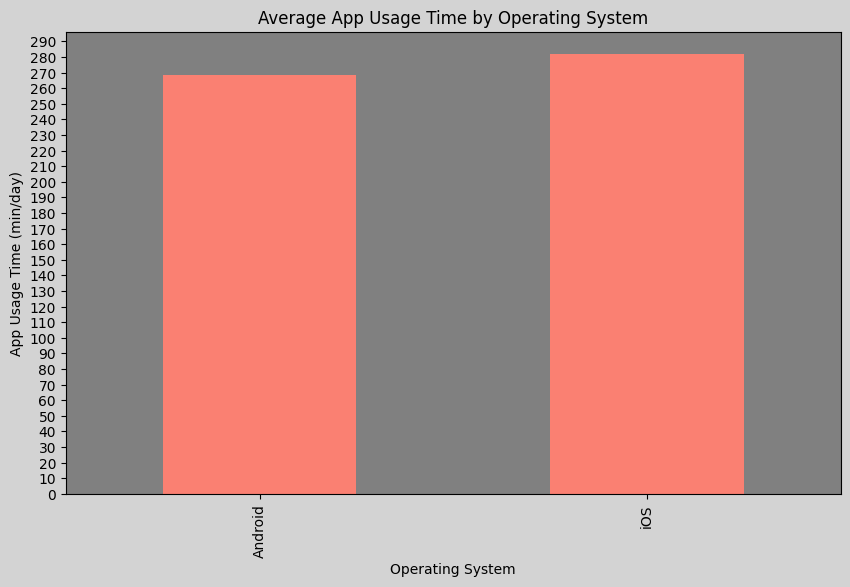

In [13]:
# Average App Usage Time by OS
app_usage_by_os = data.groupby('Operating System')['App Usage Time (min/day)'].mean()

# Plotting
plt.figure(figsize=(10, 6), facecolor='lightgrey')
plt.gca().set_facecolor('grey')
app_usage_by_os.plot(kind='bar', color='salmon')
plt.yticks(np.arange(0, 300, step=10))
plt.title('Average App Usage Time by Operating System')
plt.xlabel('Operating System')
plt.ylabel('App Usage Time (min/day)')
plt.show()


In [14]:
# Seeing specifically how close the two operating systems are from the previous chart 
data[data['Operating System'] == 'Android']['App Usage Time (min/day)'].mean()

268.2581227436823

In [15]:
data[data['Operating System'] == 'iOS']['App Usage Time (min/day)'].mean()

282.02054794520546

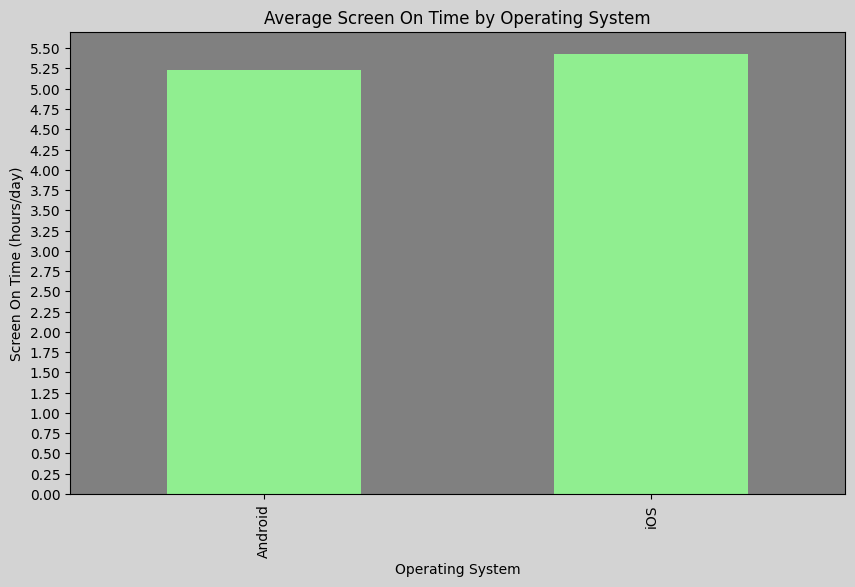

In [16]:
# Average Screen On Time by OS
screen_time_by_os = data.groupby('Operating System')['Screen On Time (hours/day)'].mean()

# Plotting
plt.figure(figsize=(10, 6), facecolor='lightgrey')
plt.gca().set_facecolor('grey')
plt.yticks(np.arange(0, 6, step=.25))
screen_time_by_os.plot(kind='bar', color='lightgreen')
plt.title('Average Screen On Time by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Screen On Time (hours/day)')
plt.show()


### 3.3 Find the Correlation Between Screen On Time and Battery Drain

Next we use Pearson correlation to measure the strength and direction of the relationship. Then we graph a scatter plot with a regression line to visualize the correlation.

In [17]:
# Calculate correlation
correlation, p_value = pearsonr(data['Screen On Time (hours/day)'], data['Battery Drain (mAh/day)'])
print(f'Correlation between Screen On Time and Battery Drain: {correlation:.2f}')


Correlation between Screen On Time and Battery Drain: 0.95


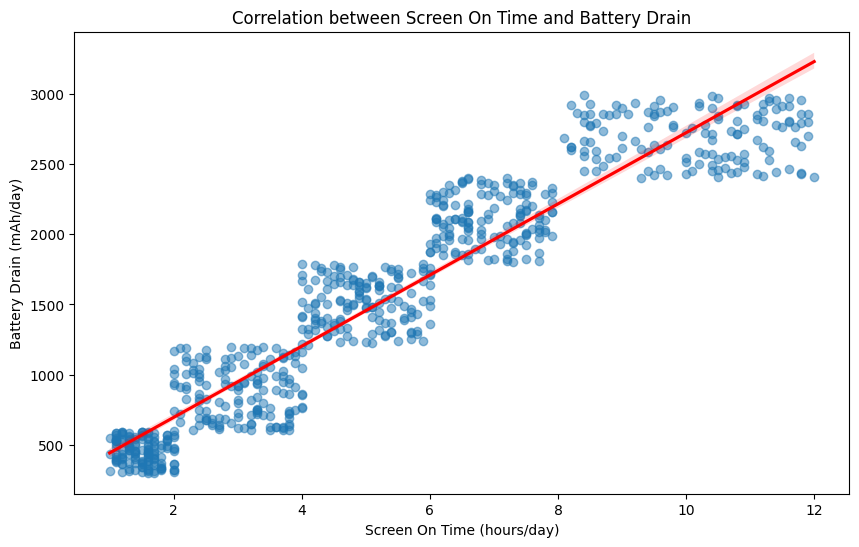

In [18]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Screen On Time and Battery Drain')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()


## Step 4: Save Cleaned Data for Tableau Visualization

Finally, we save the cleaned dataset and save it for futher Visualization in Tableau.

In [19]:
data.to_csv('cleaned_user_behaviour_data.csv', index=False)